In [49]:
# importing standard libraries
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# setting up quantities
dt=0.1 # the time interval in days
t=np.arange(0,200+dt/2,dt)
nNi=1000 # the initial number of Ni atoms

In [51]:
# a python function that computes the derivative
def nuclDecay(t,nCo,nNi0):
    return(0.113*nNi0*np.exp(-t/8.8)-0.009*nCo)

In [52]:
# first doing Euler (RK1) method
nCoEu=np.zeros(t.size)
nCoEu[0]=0 # the initial condition
for i in range(1,t.size):
    nCoEu[i] = nCoEu[i-1]+dt*nuclDecay(t[i-1],nCoEu[i-1],nNi)

In [53]:
# now trying an RK2 method
nCoRK2=np.zeros(t.size)
nCoRK2[0]=0 # the initial condition
for i in range(1,t.size):
    k1=nuclDecay(t[i-1],nCoRK2[i-1],nNi)
    k2=nuclDecay(t[i],nCoRK2[i-1]+k1*dt,nNi)
    nCoRK2[i] = nCoRK2[i-1]+dt/2*(k1+k2)

Text(0, 0.5, 'Number of $^{56}$Co atoms')

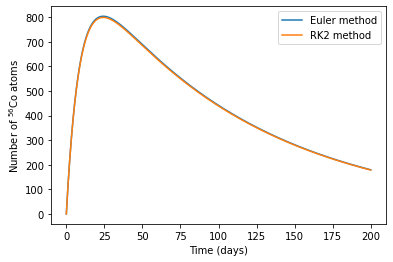

In [54]:
# plotting the result
plt.plot(t,nCoEu,label='Euler method')
plt.plot(t,nCoRK2,label='RK2 method')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel(r'Number of $^{56}$Co atoms')

Text(0, 0.5, 'Number of atoms')

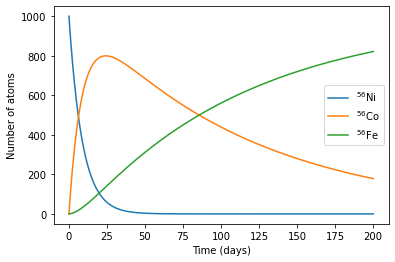

In [55]:
# just for fun, (not required) here is the number of all atoms involved as a function fo time
nNi=1000*np.exp(-t/8.8)
nFe=1000-nNi-nCoRK2
plt.plot(t,nNi,label=r'$^{56}$Ni')
plt.plot(t,nCoRK2,label=r'$^{56}$Co')
plt.plot(t,nFe,label=r'$^{56}$Fe')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel(r'Number of atoms')

In [57]:
# by knowing the masses of the three isotopes, one can compute the luminosity of the SN
# (also not required and just for fun)
mNi=55.942128*1.66e-24
mCo=55.939838*1.66e-24
mFe=55.934936*1.66e-24
c=3e10  # the speed of light
lNiCo=-(mNi-mCo)*c**2*(nNi[1:]-nNi[:-1])/dt
lCoFe=(mCo-mFe)*c**2*(nFe[1:]-nFe[:-1])/dt

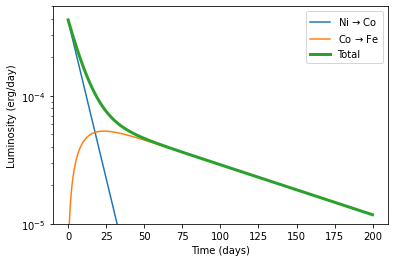

In [48]:
plt.semilogy(t[:-1],lNiCo,label=r'Ni $\to$ Co')
plt.plot(t[:-1],lCoFe,label=r'Co $\to$ Fe')
plt.plot(t[:-1],lCoFe+lNiCo,label='Total',lw=3)
plt.ylim([1e-5,5e-4])
plt.xlabel('Time (days)')
plt.ylabel('Luminosity (erg/day)')
plt.legend()